# 머신러닝 순서
- 데이터로딩
- 전처리(결측치 제거 - 안하면 학습시 오류발생)
- 스케일링(값조절, 표준화, 정규화)
- 타겟(y), 입력(독립변수 x)를 정의
- 데이터분할 - 학습데이터, 테스트데이터로 분할(7:3)
- 모델객체 생성(알고리즘)
- 학습
- 예측, 성능평가

In [2]:
# 데이터 로딩 - 붓꽃데이터 - iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
iris = pd.read_csv( url )
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
# 구조확인
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [61]:
# x, y 분할
Y = iris["variety"]
X = iris[["sepal.length","sepal.width","petal.length"]] #X는 반드시 2차원 #iris.drop(columns="variety")
X

,sepal.length,sepal.width,petal.length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [62]:
# 데이터의 학습, 테스트 분할
from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte = train_test_split(
    X, Y, test_size = 0.3, random_state=0
)
xtr.shape, xte.shape, ytr.shape, yte.shape

((105, 3), (45, 3), (105,), (45,))

In [68]:
# 모델 생성
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9)
model.fit(xtr,ytr) # 훈련(학습)
print( model.score(xte, yte) )

0.9555555555555556


C:\Users\younghwankim\anaconda3-22-10\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [64]:
# 예측
# print( xtr.iloc[0,0], ytr[0] )
# print( xtr.head(1), ytr[0] )
# print(xte)
# print(model.predict( [[5.0, 0.2, 5.0, 1.1]] )) # xte입력에 대한 종류 예측값
# print(yte) # 실제 정답
# 정답율계산
# print( np.mean( model.predict( xte ) == yte ) )
# print( sum( model.predict( xte ) == yte ) / len(yte) )
# print( model.score(xte, yte) )

C:\Users\younghwankim\anaconda3-22-10\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\younghwankim\anaconda3-22-10\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

[1.0, 0.9523809523809523, 0.9714285714285714, 0.9714285714285714, 0.9619047619047619, 0.9714285714285714, 0.9619047619047619, 0.9619047619047619, 0.9714285714285714, 0.9714285714285714]
[0.9555555555555556, 0.9555555555555556, 0.9111111111111111, 0.9333333333333333, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556]


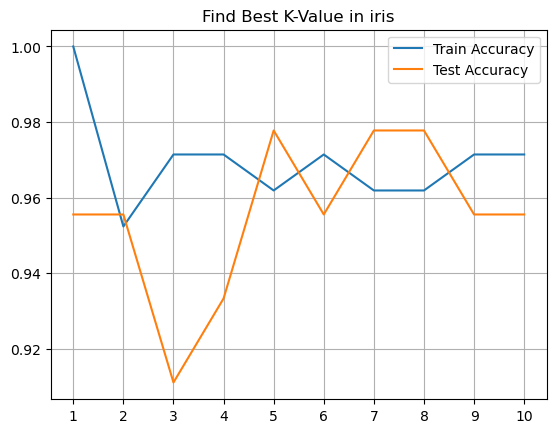

In [70]:
k_range = range(1, 11)
train_score = []
test_score = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k).fit(xtr, ytr)
    train_score.append(model.score(xtr, ytr))
    test_score.append(model.score(xte, yte))
    
print(train_score)
print(test_score)

plt.plot(k_range, train_score, label='Train Accuracy')
plt.plot(k_range, test_score, label='Test Accuracy')
plt.xticks(k_range)
plt.title('Find Best K-Value in iris')
plt.legend()
plt.grid()
plt.show()

In [71]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

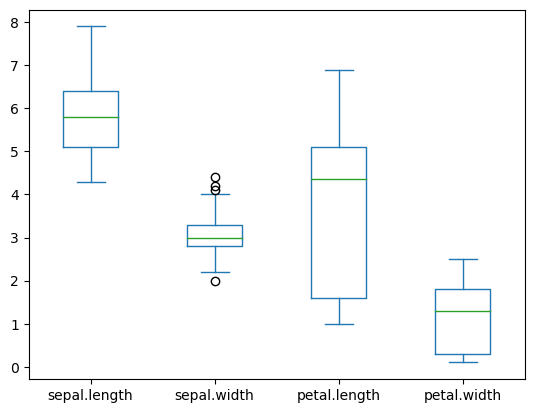

In [73]:
iris.drop(columns="variety").plot.box()

<AxesSubplot:>

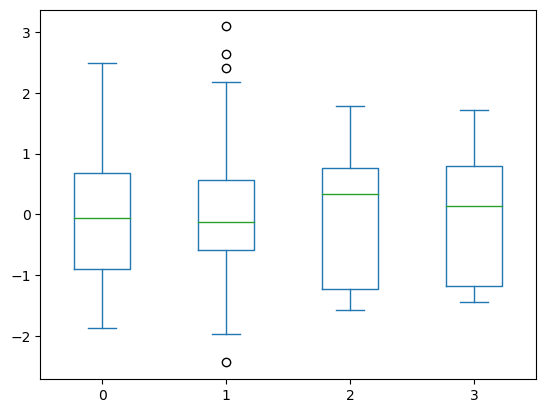

In [78]:
from sklearn.preprocessing import StandardScaler
ss_iris = StandardScaler().fit_transform( 
    iris.drop(columns="variety")    # 변환은 숫자만 가능
)
pd.DataFrame(ss_iris).plot.box()

<AxesSubplot:>

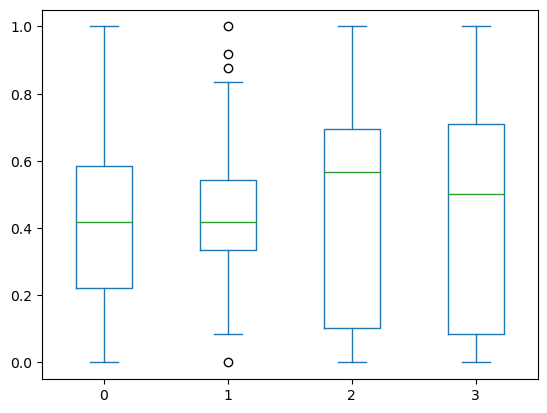

In [79]:
from sklearn.preprocessing import MinMaxScaler
ss_iris = MinMaxScaler().fit_transform( 
    iris.drop(columns="variety")    # 변환은 숫자만 가능
)
pd.DataFrame(ss_iris).plot.box()

In [80]:
# 위스콘신 주립대학 유방암 검진정보
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [83]:
cancer_df = pd.DataFrame(
    cancer["data"],
    columns = cancer["feature_names"]
)
cancer_df["target"] = cancer["target"]
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [84]:
cancer["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [86]:
cancer_df["target"].replace({0:"malignant",1:"benign"}, inplace=True)

In [87]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [89]:
# 구조
cancer_df.info()
# 결측치 검사, 처리
print( cancer_df.isnull().sum() )
# 머신러닝 코딩
Y = cancer_df["target"]
X = cancer_df.drop(columns="target")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [99]:
# 훈련, 테스트 데이터로 분할
from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte = train_test_split(
    X, Y, random_state = 0, stratify = Y
)
print(xtr.shape, xte.shape, ytr.shape, yte.shape )
# 전체 데이터에서의 악성,양성 비율 = 0.62: 0.37
print(cancer_df["target"].value_counts(normalize=True)) 
# ytr에서의 악성,양성 비율 = 0.62: 0.37
print(ytr.value_counts(normalize=True))
# yte에서의 악성,양성 비율 = 0.62: 0.37
print(yte.value_counts(normalize=True))

(426, 30) (143, 30) (426,) (143,)
benign       0.627417
malignant    0.372583
Name: target, dtype: float64
benign       0.626761
malignant    0.373239
Name: target, dtype: float64
benign       0.629371
malignant    0.370629
Name: target, dtype: float64


In [100]:
# 모델생성, 훈련, 성능평가
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3).fit(xtr, ytr)
print("train score:", model.score(xtr, ytr))
print("test score:", model.score(xte, yte))

train score: 0.960093896713615
test score: 0.9300699300699301


C:\Users\younghwankim\anaconda3-22-10\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\younghwankim\anaconda3-22-10\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

C:\Users\younghwankim\anaconda3-22-10\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\younghwankim\anaconda3-22-10\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

C:\Users\younghwankim\anaconda3-22-10\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[1.0, 0.9530516431924883, 0.960093896713615, 0.9507042253521126, 0.9553990610328639, 0.9436619718309859, 0.9413145539906104, 0.9366197183098591, 0.9389671361502347, 0.9389671361502347]
[0.9090909090909091, 0.916083916083916, 0.9300699300699301, 0.9300699300699301, 0.9230769230769231, 0.9370629370629371, 0.9370629370629371, 0.9300699300699301, 0.9440559440559441, 0.9370629370629371]


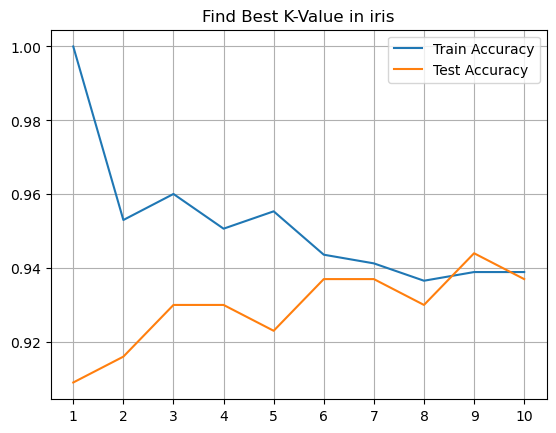

In [101]:
k_range = range(1, 11)
train_score = []
test_score = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k).fit(xtr, ytr)
    train_score.append(model.score(xtr, ytr))
    test_score.append(model.score(xte, yte))
    
print(train_score)
print(test_score)

plt.plot(k_range, train_score, label='Train Accuracy')
plt.plot(k_range, test_score, label='Test Accuracy')
plt.xticks(k_range)
plt.title('Find Best K-Value in iris')
plt.legend()
plt.grid()
plt.show()